In [1]:
import os
import requests as req
import json
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import json
import openweathermapy.core as ow
from citipy import citipy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
female_names_file = os.path.join("Revised National Names Female.csv")
male_names_file = os.path.join("Revised National Names Male.csv")
female_df = pd.read_csv(female_names_file)
male_df = pd.read_csv(male_names_file)

In [3]:
female_df.head()

,Unnamed: 0,Id,Name,Year,Gender,Count,Rank,First Year,Total Count
0,0,1,Mary,1880,F,7065,1,1880,4115282
1,1,2,Anna,1880,F,2604,2,1880,873767
2,2,3,Emma,1880,F,2003,3,1880,593970
3,3,4,Elizabeth,1880,F,1939,4,1880,1601128
4,4,5,Minnie,1880,F,1746,5,1880,158565


In [4]:
male_df.head()

,Unnamed: 0,Id,Name,Year,Gender,Count,Rank,First Year,Total Count
0,0,943,John,1880,M,9655,1,1880,5084943
1,1,944,William,1880,M,9532,2,1880,4055473
2,2,945,James,1880,M,5927,3,1880,5105919
3,3,946,Charles,1880,M,5348,4,1880,2364332
4,4,947,George,1880,M,5126,5,1880,1454503


# Observations:
1 - In this session of the project, I have focused on the names that have been used for both males and females over time. Therefore, I was able to analyze not only how these names have changed, but the reason for some of these changes.

2 - It was also interesting to see the massive influence of public figures thorough time in the United States. The influence on names comes from several ranges such as TV shows, sports, royal family, and politicians. 

In [5]:
df_merge = pd.merge(female_df, male_df, how = 'outer',
                   left_on = ['Name', 'Year'], right_on = ['Name', 'Year'])

In [6]:
df_merge.head()

,Unnamed: 0_x,Id_x,Name,Year,Gender_x,Count_x,Rank_x,First Year_x,Total Count_x,Unnamed: 0_y,Id_y,Gender_y,Count_y,Rank_y,First Year_y,Total Count_y
0,0.0,1.0,Mary,1880,F,7065.0,1.0,1880.0,4115282.0,331.0,1274.0,M,27.0,325.0,1880.0,15159.0
1,1.0,2.0,Anna,1880,F,2604.0,2.0,1880.0,873767.0,528.0,1471.0,M,12.0,526.0,1880.0,2721.0
2,2.0,3.0,Emma,1880,F,2003.0,3.0,1880.0,593970.0,612.0,1555.0,M,10.0,600.0,1880.0,1576.0
3,3.0,4.0,Elizabeth,1880,F,1939.0,4.0,1880.0,1601128.0,648.0,1591.0,M,9.0,640.0,1880.0,5154.0
4,4.0,5.0,Minnie,1880,F,1746.0,5.0,1880.0,158565.0,668.0,1611.0,M,9.0,640.0,1880.0,787.0


In [7]:
df_merge_needed = df_merge[['Name', 'Year', 'Count_x', 'Count_y']]
df_merge_needed.columns = ['Name', 'Year', 'Female Count', 'Male Count']

In [8]:
df_merge_needed.head()

,Name,Year,Female Count,Male Count
0,Mary,1880,7065.0,27.0
1,Anna,1880,2604.0,12.0
2,Emma,1880,2003.0,10.0
3,Elizabeth,1880,1939.0,9.0
4,Minnie,1880,1746.0,9.0


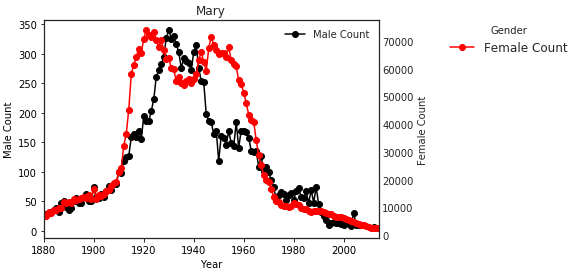

In [9]:
# Top 3 in our list for most used for female names
mary_graph = df_merge_needed[df_merge_needed['Name'] == 'Mary']
# mary_graph.plot()
# plt.show()
fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    mary_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    mary_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Mary")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('mary.png', bbox_inches='tight')
plt.show()

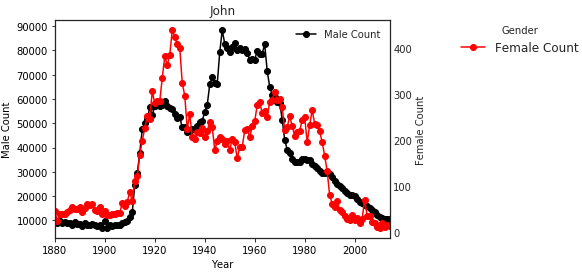

In [10]:
# Top 3 in our list for most used for male names
john_graph = df_merge_needed[df_merge_needed['Name'] == 'John']
fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    john_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    john_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("John")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('john.png', bbox_inches='tight')
plt.show()

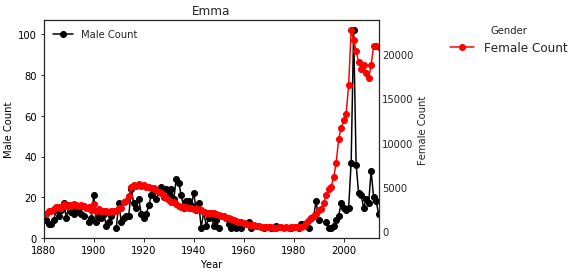

In [11]:
# Top 3 in our list for most used for female names
emma_graph = df_merge_needed[df_merge_needed['Name'] == 'Emma']
fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    emma_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    emma_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Emma")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('emma.png', bbox_inches='tight')
plt.show()

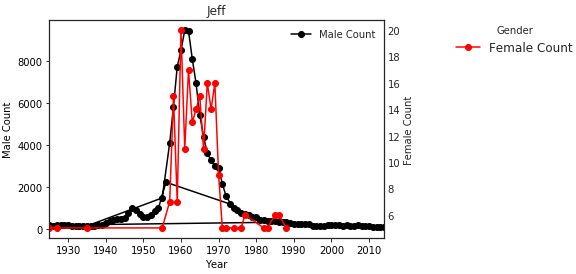

In [12]:
# Playing with random names from the data
jeff_graph = df_merge_needed[df_merge_needed['Name'] == 'Jeff']
fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    jeff_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    jeff_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Jeff")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('jeff.png', bbox_inches='tight')
plt.show()

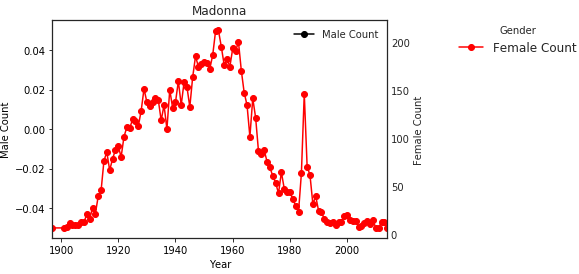

In [13]:
# Fairly old name, however we can see the peak in 1981 when Madonna started her solo carrer as a singer. 
madonna_graph = df_merge_needed[df_merge_needed['Name'] == 'Madonna']

fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    madonna_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    madonna_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Madonna")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('madonna.png', bbox_inches='tight')
plt.show()

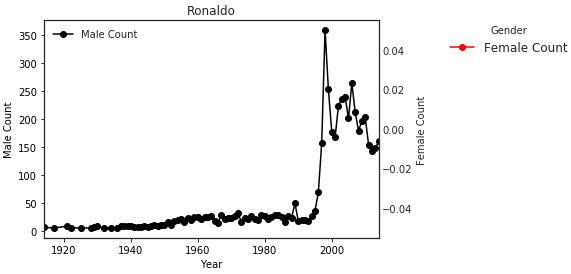

In [14]:
# Soccer influence in the US, especially after the 1994 World Cup in the US. 
ronaldo_graph = df_merge_needed[df_merge_needed['Name'] == 'Ronaldo']

fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    ronaldo_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    ronaldo_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Ronaldo")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('ronaldo.png', bbox_inches='tight')
plt.show()

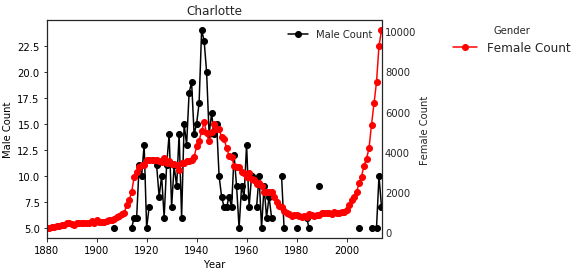

In [15]:
# The boom is related to the birth of princess Charlotte of Cambridge
charlotte_graph = df_merge_needed[df_merge_needed['Name'] == 'Charlotte']

fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    charlotte_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    charlotte_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Charlotte")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('charlotte.png', bbox_inches='tight')
plt.show()

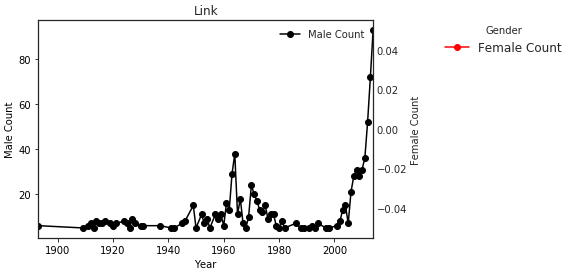

In [16]:
link_graph = df_merge_needed[df_merge_needed['Name'] == 'Link']

fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    link_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    link_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Link")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('link.png', bbox_inches='tight')
plt.show()

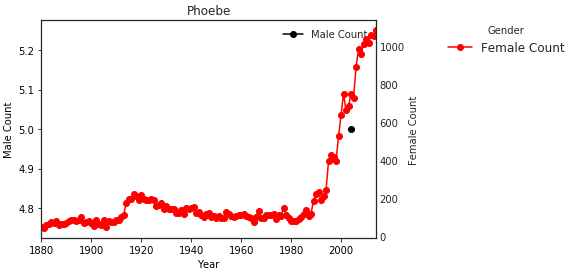

In [17]:
#Friends started in 1994
phoebe_graph = df_merge_needed[df_merge_needed['Name'] == 'Phoebe']

fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    phoebe_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    phoebe_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Phoebe")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('phoebe.png', bbox_inches='tight')
plt.show()

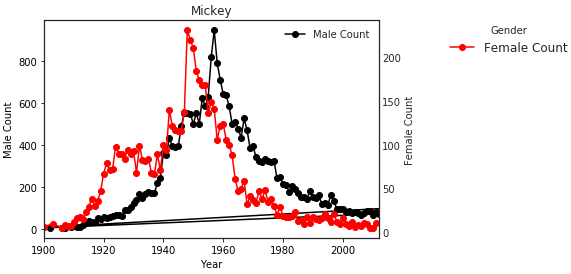

In [18]:
mickey_graph = df_merge_needed[df_merge_needed['Name'] == 'Mickey']

fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    mickey_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    mickey_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Mickey")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('mickey.png', bbox_inches='tight')
plt.show()

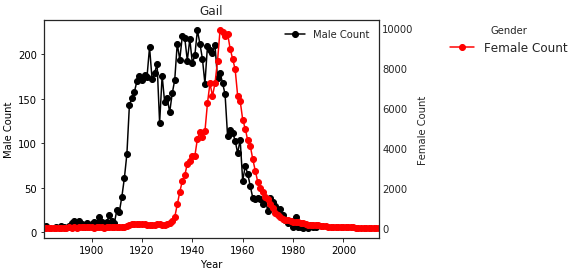

In [19]:
#Gail stated being used as a male name, and turned into a female name (mostly influenced by Gail Russell)
gail_graph = df_merge_needed[df_merge_needed['Name'] == 'Gail']

fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    gail_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    gail_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Gail")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('gail.png', bbox_inches='tight')
plt.show()

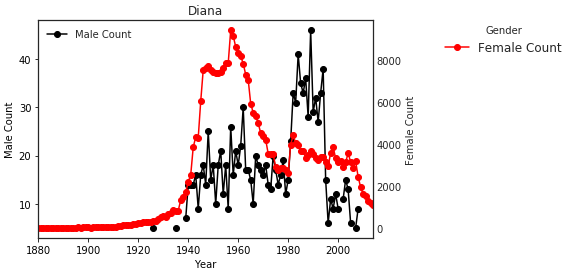

In [20]:
diana_graph = df_merge_needed[df_merge_needed['Name'] == 'Diana']

fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    diana_graph[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', label="Male Count"),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    diana_graph[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', label="Female Count"),
    plt.title("Diana")   
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=3,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('diana.png', bbox_inches='tight')
plt.show()

In [21]:
top_head = df_merge_needed.head(5)
top_head

,Name,Year,Female Count,Male Count
0,Mary,1880,7065.0,27.0
1,Anna,1880,2604.0,12.0
2,Emma,1880,2003.0,10.0
3,Elizabeth,1880,1939.0,9.0
4,Minnie,1880,1746.0,9.0


In [22]:
mary = df_merge_needed[(df_merge_needed.Name == "Mary")]
anna = df_merge_needed[(df_merge_needed.Name == "Anna")]
emma = df_merge_needed[(df_merge_needed.Name == "Emma")]
john = df_merge_needed[(df_merge_needed.Name == "John")]
shaquille = df_merge_needed[(df_merge_needed.Name == "Shaquille")]
jordan = df_merge_needed[(df_merge_needed.Name == "Jordan")]

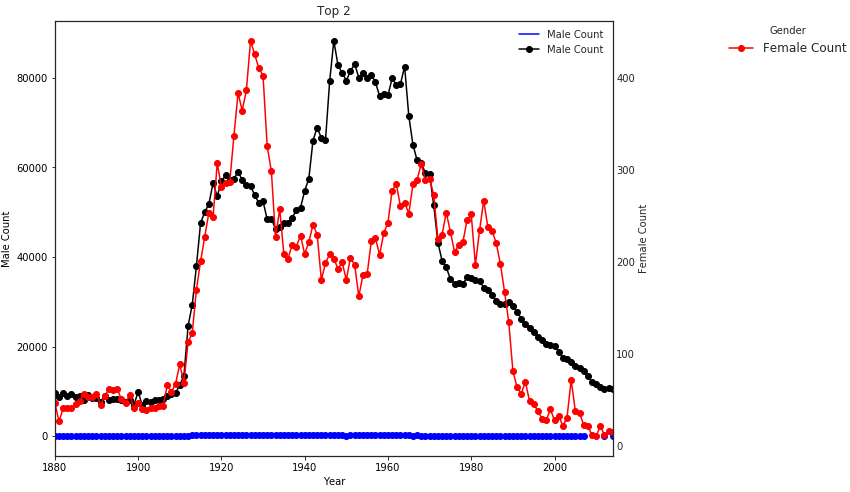

In [23]:
fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    mary[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='b', marker='o', figsize=(10,8)),
    mary[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='lightcoral', marker='o', figsize=(10,8)),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    john[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', figsize=(10,8)),
    john[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', figsize=(10,8)),
    plt.title("Top 2")
    plt.ylabel("Female Count")
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=1,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('top2.png', bbox_inches='tight')
plt.show()

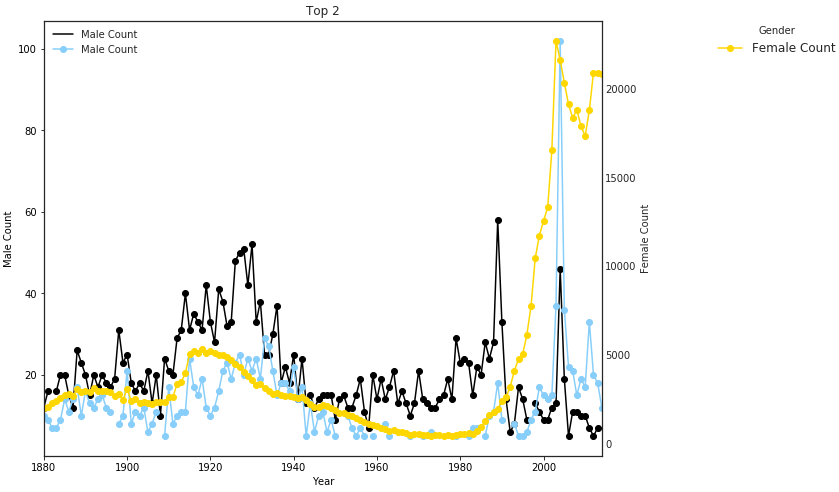

In [24]:
fig, ax = plt.subplots()
ax2.spines['right'].set_visible(True)

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    anna[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', figsize=(10,8)),
    anna[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', figsize=(10,8)),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    emma[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='lightskyblue', marker='o', figsize=(10,8)),
    emma[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='gold', marker='o', figsize=(10,8)),
    plt.title("Top 2")
    plt.ylabel("Female Count")
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=1,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('top_2.png', bbox_inches='tight')
plt.show()

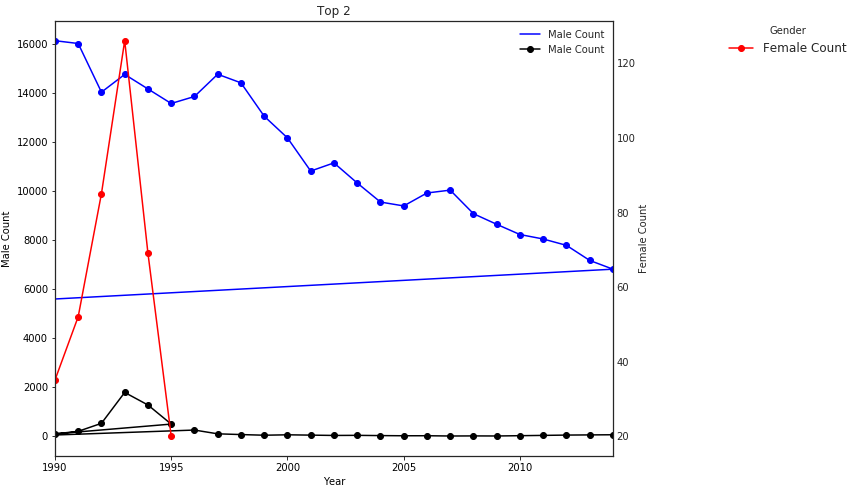

In [25]:
fig, ax = plt.subplots()

with sns.axes_style('white'):
    ax.yaxis.set_label_position("left")
    plt.ylabel("Male Count")
    jordan[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='b', marker='o', figsize=(10,8)),
    jordan[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='lightcoral', marker='o', figsize=(10,8)),
    ax2 = ax.twinx()
    ax2.yaxis.set_label_position("right")
    plt.ylabel("Female Count")
    shaquille[['Male Count','Year']].plot(ax=ax, x='Year',linestyle='-', color='k', marker='o', figsize=(10,8)),
    shaquille[['Female Count','Year']].plot(ax=ax2, x='Year',linestyle='-', color='r', marker='o', figsize=(10,8)),
    plt.title("Top 2")
    plt.ylabel("Female Count")
    plt.xlabel("Year")
    plt.legend(loc=2, bbox_to_anchor=(1.2, 1), borderaxespad=0.,
                   ncol=1,
                   fontsize=12,
                   scatterpoints=1, 
                   title="Gender")
    plt.savefig('top_2_2.png', bbox_inches='tight')
plt.show()

In [26]:
male = male_df.head(15000)

In [27]:
text_file = ''

for index, row in male.fillna(value=0).iterrows():
    texts = (row['Name'] + ' ') * int(row['Count'])
    text_file += texts

In [ ]:
#text_file

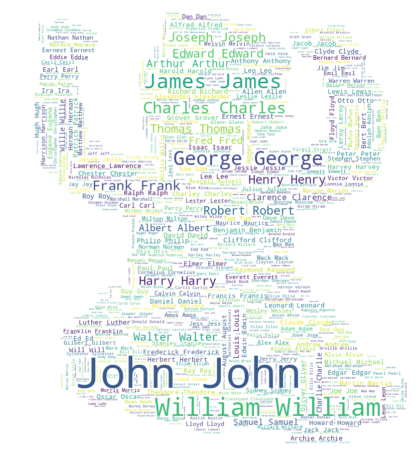

In [28]:
d = path.dirname('C:/Users/gpalv/Desktop/project_pictures')

text = (text_file)

babies_coloring = np.array(Image.open('C:/Users/gpalv/Desktop/project_pictures/babies_wordcloud_test6.jpg'))
stopwords = set(STOPWORDS)
# stopwords.add("said")

wc = WordCloud(background_color="white", max_words=50000, mask=babies_coloring,
               stopwords=stopwords, max_font_size=100, random_state=42)

wc.generate(text)

default_colors = wc.to_array()

image_colors = ImageColorGenerator(babies_coloring)

plt.figure(figsize=(20,8))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.figure()
# plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# plt.axis("off")
# plt.figure()
# plt.imshow(babies_coloring, cmap=plt.cm.gray, interpolation="bilinear")
# plt.axis("off")
plt.savefig('male.png', bbox_inches='tight')
plt.show()

In [29]:
female = female_df.head(15000)

In [30]:
text_file = ''

for index, row in female.fillna(value=0).iterrows():
    texts = (row['Name'] + ' ') * int(row['Count'])
    text_file += texts

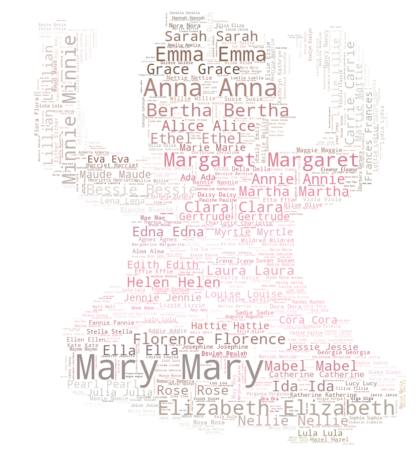

In [31]:
d = path.dirname('C:/Users/gpalv/Desktop/project_pictures')

text = (text_file)

babies_coloring = np.array(Image.open('C:/Users/gpalv/Desktop/project_pictures/babies_wordcloud_test6.jpg'))
stopwords = set(STOPWORDS)
# stopwords.add("said")

wc = WordCloud(background_color="white", max_words=50000, mask=babies_coloring,
               stopwords=stopwords, max_font_size=100, random_state=42)

wc.generate(text)

default_colors = wc.to_array()

image_colors = ImageColorGenerator(babies_coloring)

plt.figure(figsize=(20,8))

# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.figure()
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
# plt.figure()
# plt.imshow(babies_coloring, cmap=plt.cm.gray, interpolation="bilinear")
# plt.axis("off")
plt.savefig('female.png', bbox_inches='tight')
plt.show()